# $k$-means Clustering

In [1]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets

# import Alison's code for the demo clusters
import src.demo_images as demo
from src.k_means_plotter import k_means

## Learning Goals

- Assess what scenarios could use $k$-means
- Articulate the methodology used by $k$-means
- Apply KMeans from sklearn.cluster to a relevant dataset
- Select the appropriate number of clusters using the elbow method and Silhouette Scores
- Evaluate the weaknesses and remedies to $k$-means

## A Classic Scenario

>You work for the marketing department within a large company that manages a customer base. 
For each customer you have a record of average purchase cost and time since last purchase.<br> 
You know that if you want to retain your customers you cannot treat them the same. You can use targeted marketing ads towards groups that demonstrate different behavior, but how will you divide the customers into groups?

## Clustering!   Finding **GROUPS**

How many groups do you see?

<img src="images/initialscenario.png" width=600>

## Wait - How is clustering different from classification?

>In _classification_ you **know** what groups are in the dataset and the goal is to _**predict**_ class membership accurately.

>In _clustering_ you **do not** know which groups are in the dataset and you are trying to _**identify**_ the groups.

Because we do not have target labels, clustering is a form of machine learning called **unsupervised learning**.

### So what do you do with clustering results?

Clustering is often an *informing* step in your analysis. Once clusters are identified, one can:
- Create strategies on how to approach each group differently
- Use cluster membership as an independent variable in a predictive model
- Use the clusters as the _**target label**_ in future classification models. How would you assign new data to the existing clusters?

## Explore the algorithm with an intuitive K means approach

### Observe the following four methods with a sample dataset:

### Method Questions:

- What do they have in common?
- What are the differences between them?
- How many groups are there in the end?
- Do you see any problems with this method?

| Method 1 | Method 2 |
| -------- | -------- |
| <img src="images/from-left.gif" width=400> | <img src="images/from-right.gif" width=400> |

| Method 3 | Method 4 |
| -------- | -------- |
| <img src="images/from-top.gif" width=400> | <img src="images/from-bottom.gif" width=400> |

In common:

- they were creating 4 clusters
- they used the same approach


Differences:

- BUT all ended up with different final clusters
- because they started from different points/sides


Groups:

- 4 (but different across methods)


Problem with this method?

- VERY RANDOM and sensitive to initial starting points


### K-means algorithm, at its core, in an optimization function

<img src="images/minmaxdata.png" width=400>

### Reassigns groups and adjusts centroids to...

<img src="images/min.png" width=700>

### And to...

<img src="images/max.png" width=700>

**Sci-kit Learn** documentation actually has some pretty good [documentation describing the algorithm](https://scikit-learn.org/stable/modules/clustering.html#k-mean) if you wish for more detail.

## The Challenges of Clustering

In [2]:
X, Y = make_blobs(centers=5, random_state=42)
X[:5, :]

array([[-6.2927701 , -4.68965397],
       [ 2.03530213,  5.61498563],
       [-2.97261532,  8.54855637],
       [ 0.64463087,  3.22362652],
       [-8.73867639,  6.82004726]])

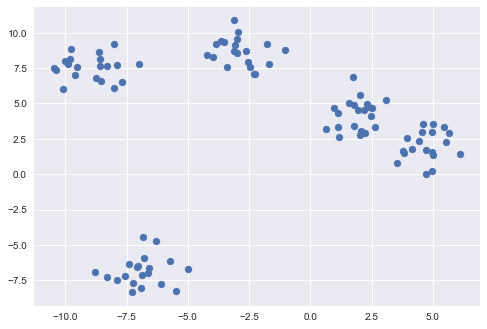

In [3]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1]);

The value of the `random_state` parameter in our `k_means()` function can make a big difference to the final clusters! We might find what are indeed the intuitive clusters in our data:

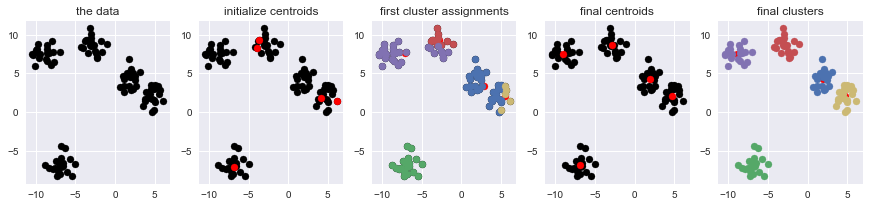

In [4]:
df = k_means(X[:, 0], X[:, 1], k=5, random_state=2)

But we also might get different results:

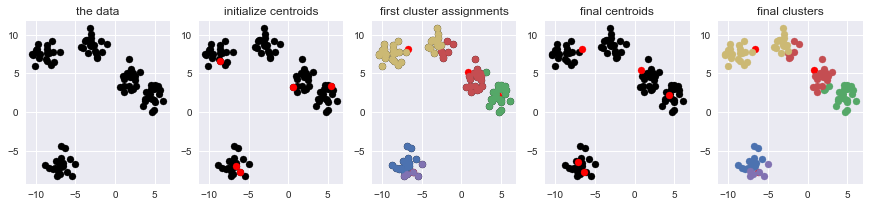

In [5]:
df = k_means(X[:, 0], X[:, 1], k=5, random_state=42)

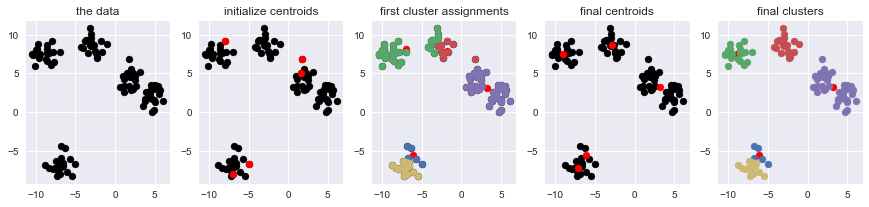

In [6]:
df = k_means(X[:, 0], X[:, 1], k=5, random_state=3)

And of course we could set $k$ to something other than 5:

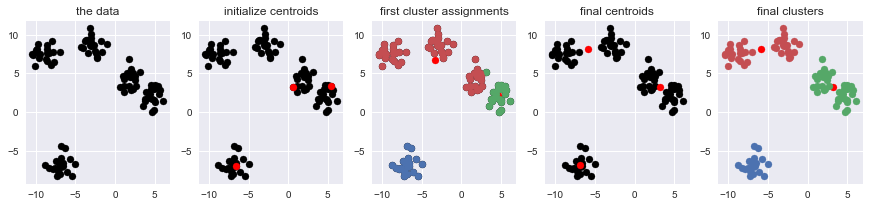

In [7]:
df = k_means(X[:, 0], X[:, 1], k=3)

## **Assumptions** and **challenges** of $k$-means

- Demonstrate the ideal $k$-means dataset
- Show three scenarios where $k$-means struggles

#### Ideal $k$-means scenario

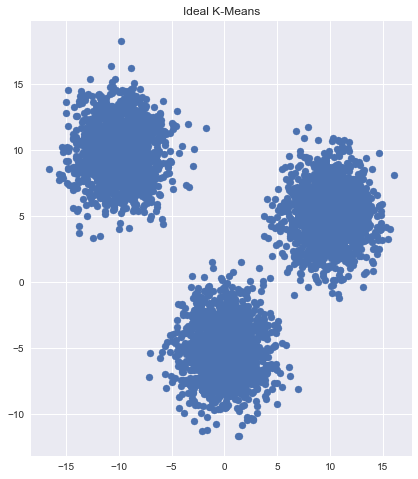

In [8]:
demo.ideal()

#### Meets all assumptions:

- Independent variables
- Balanced cluster sizes
- Clusters have similar density
- Spherical clusters/equal variance of variables


#### Problem Scenario 1 - classes not all round

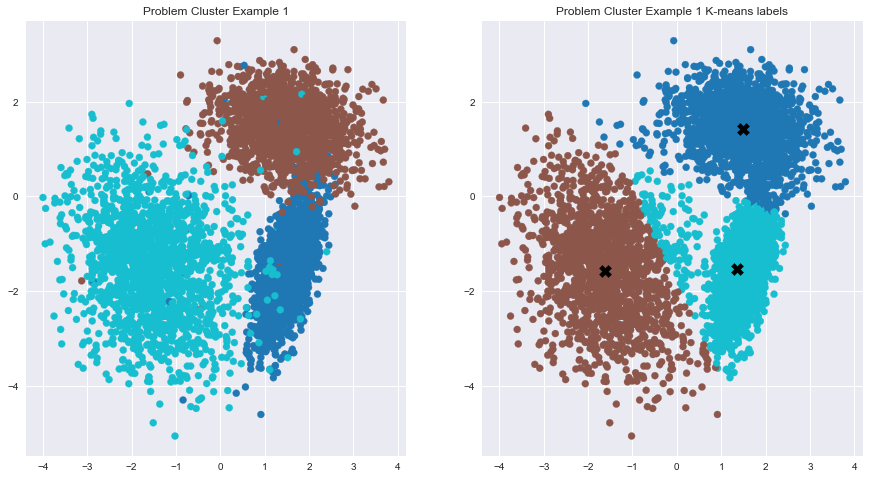

In [9]:
demo.messyOne()

#### Problem Scenario 2 - imbalanced class size

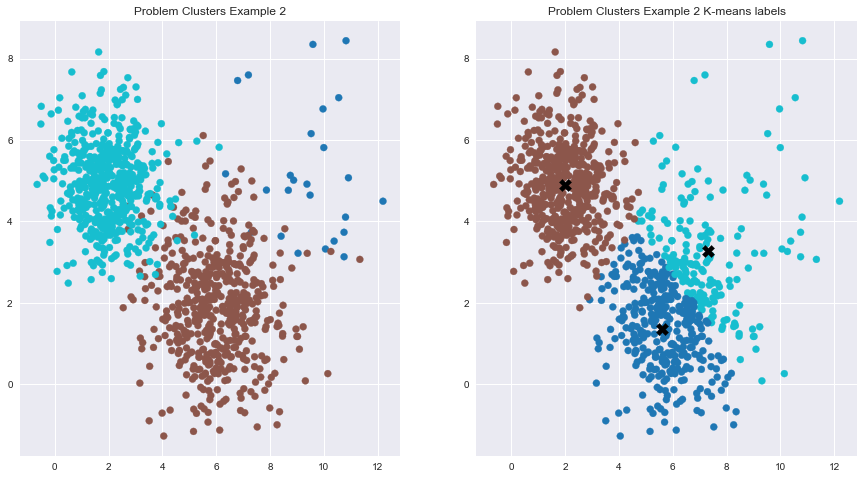

In [10]:
demo.messyTwo()

#### Problem Scenario 3 - class size and density

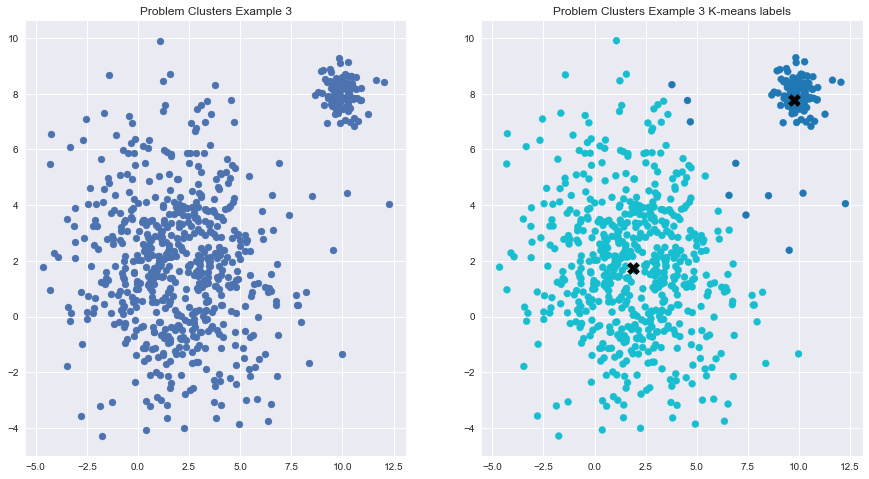

In [11]:
demo.messyThree()

#### Solution to challenges:

- Preprocessing: PCA or scaling
- Try a different clustering methods

### Simple Demonstration

- This is a sample dataset. 
- Let us assume the data is already scaled.

In [12]:
dummy_dat = pd.read_csv("data/xclara.txt",
                        header=0,
                        index_col=0)

In [13]:
dummy_dat.head()

,V1,V2
1,2.072345,-3.241693
2,17.936710,15.784810
3,1.083576,7.319176
4,11.120670,14.406780
5,23.711550,2.557729


#### EDA of variables

In [14]:
dummy_dat.describe()

,V1,V2
count,3000.000000,3000.000000
mean,40.611358,22.862141
std,25.859054,31.759714
min,-22.495990,-38.795500
25%,18.462790,-4.003494
50%,41.552210,13.827390
75%,62.249480,55.729100
max,104.376600,87.313700


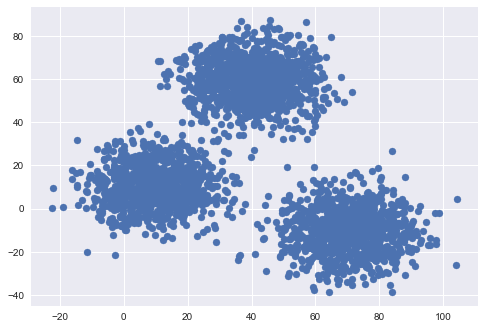

In [15]:
fig, ax = plt.subplots()
ax.scatter(dummy_dat['V1'], dummy_dat['V2']);

#### Introduction of `Kmeans`

In [16]:
model = KMeans(n_clusters=3).fit(dummy_dat)

In [17]:
model.cluster_centers_

array([[ 69.92418447, -10.11964119],
       [  9.4780459 ,  10.686052  ],
       [ 40.68362784,  59.71589274]])

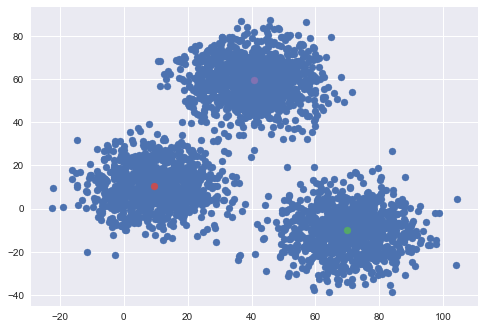

In [18]:
fig, ax = plt.subplots()
ax.scatter(dummy_dat['V1'], dummy_dat['V2'])
for i in range(len(model.cluster_centers_)):
    ax.scatter(model.cluster_centers_[i][0],
               model.cluster_centers_[i][1]);

In [19]:
model.predict([[60, -20]])

array([0], dtype=int32)

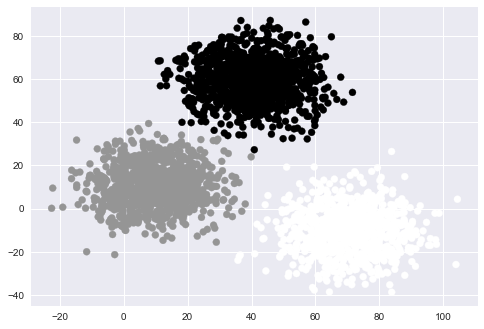

In [20]:
fig, ax = plt.subplots()
ax.scatter(dummy_dat['V1'], dummy_dat['V2'],
           c=model.labels_);

In [21]:
labeled_df = pd.concat([dummy_dat, 
                        pd.DataFrame(model.labels_, columns=['cluster'])], 
                       axis=1)

In [22]:
labeled_df.head()

,V1,V2,cluster
0,NaN,NaN,1.0
1,2.072345,-3.241693,1.0
2,17.936710,15.784810,1.0
3,1.083576,7.319176,1.0
4,11.120670,14.406780,1.0


In [23]:
cluster0 = labeled_df[labeled_df['cluster'] == 0]
cluster1 = labeled_df[labeled_df['cluster'] == 1]
cluster2 = labeled_df[labeled_df['cluster'] == 2]

In [24]:
cluster0['V1'].head()

561     -8.399909
769      5.165351
2050    44.655730
2051    68.776160
2052    56.225340
Name: V1, dtype: float64

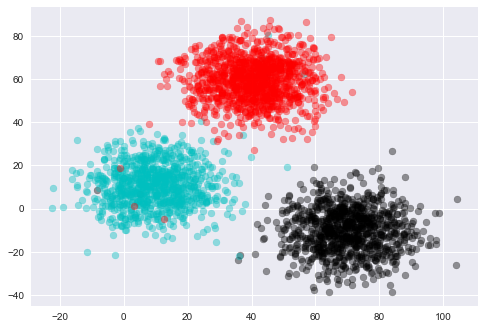

In [25]:
fig, ax = plt.subplots()
ax.scatter(cluster0['V1'], cluster0['V2'], c='k', alpha=0.4)
ax.scatter(cluster1['V1'], cluster1['V2'], c='c', alpha=0.4)
ax.scatter(cluster2['V1'], cluster2['V2'], c='r', alpha=0.4);

## Note
#### You *may* have different cluster centers.

We saw in the demo that the algorithm is sensitive to starting points. It's a good idea to use `random_state` to ensure repeatable results.

## Choosing the appropriate number for $k$

#### Two metrics we can use: *Elbow Method* and the *Silhouette Coefficient*

### Elbow Method

Elbow method uses the sum of squared error (SSE) calculated from each instance of $k$ to find the best value of $k$.

This is sometimes called the "inertia" of the model, and fitted sklearn $k$-means models have an `inertia_` attribute.

Sometimes you will see the SSE divided by the total sum of squares in the dataset (how far is each point from the center of the entire dataset)

Fewer clusters seems better, but _inertia will always decrease with more clusters_. Hence the idea of looking for an _elbow_ in the plot of inertia vs. $k$.

In [26]:
model.inertia_

611605.8806933895

Inertia is the sum of squared distances between points and their cluster center.

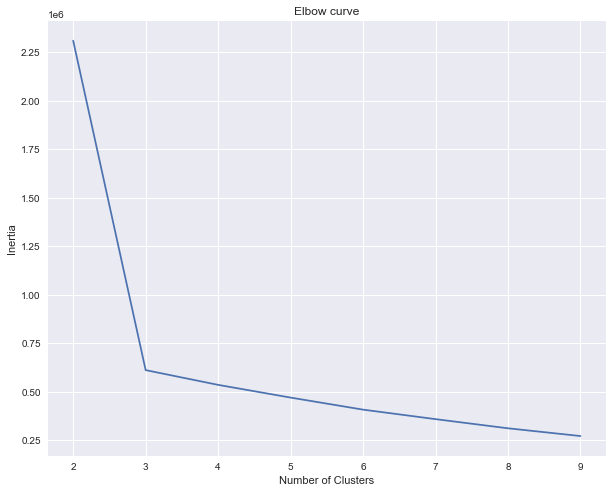

In [27]:
# Specifying the dataset and initializing variables
X = dummy_dat
distortions = []

# Calculate inertia for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=301)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot values of inertia
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Elbow curve')
ax.set_xlabel('k')
ax.plot(range(2, 10), distortions)
ax.grid(True)
ax.set_ylabel("Inertia")
ax.set_xlabel("Number of Clusters");

#### How many clusters is best?

- 3 clusters is best / it is the point of the "elbow"



### Silhouette Coefficient

![silo](images/silo2.png)

> **a** refers to the average distance between a point and all other points in that cluster.
>
> **b** refers to the average distance between that same point and all other points in clusters to which it does not belong

It is calculated for each point in the dataset, then averaged across all points for one cumulative score.

The Silhouette Coefficient ranges between -1 and 1. The closer to 1, the more clearly defined are the clusters. The closer to -1, the more incorrect assignment.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html



In [28]:
# Grab the labels
labels = model.labels_

In [29]:
# Let's score using sklearn's silhouette_score
metrics.silhouette_score(dummy_dat, labels)

0.6945587736089913

In [30]:
# Finding silhouette scores for many values of k
silhouette_scores = {}

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=301)
    kmeans.fit(dummy_dat)
    silhouette_scores[k] = metrics.silhouette_score(dummy_dat, kmeans.labels_)

In [31]:
silhouette_scores

{2: 0.542435069970526,
 3: 0.6945587736089913,
 4: 0.5410825704198919,
 5: 0.40969605029798684,
 6: 0.3105919499990671,
 7: 0.32177185089772803,
 8: 0.3317975738158486,
 9: 0.3414612974493247}

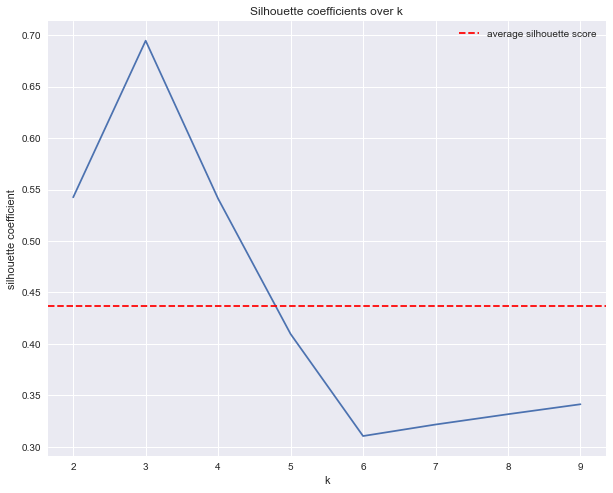

In [32]:
# Plot Silhouette coefficient
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(range(2, 10), silhouette_scores.values())
ax.axhline(y=np.mean(list(silhouette_scores.values())), color="red", linestyle="--", 
           label="average silhouette score")

ax.set_title('Silhouette coefficients over k')
ax.set_xlabel('k')
ax.set_ylabel('silhouette coefficient')
ax.legend()
ax.grid(True)

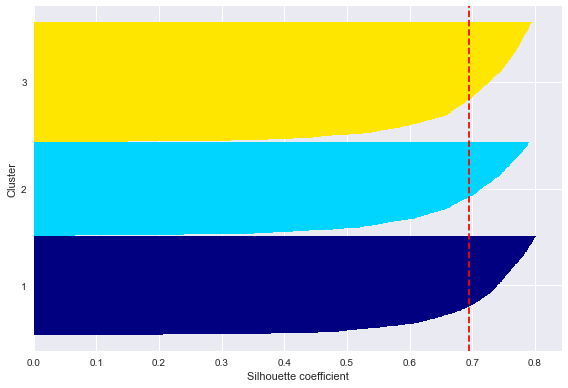

In [33]:
# From a colleague
# This will showcase what each cluster looks like in terms of fit
from matplotlib import cm

km = KMeans(n_clusters=3, random_state=0)
y_km = km.fit_predict(dummy_dat)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = metrics.silhouette_samples(dummy_dat, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

### Clustering Review:

No right answers! Just looking for patterns.

Evaluate goodness-of-fit using either elbow scores or silhouette scores.

Want elbow score to be low (but not minimum), silhouette score to be high.

#### Useful Resource!

The Yellowbrick library has some of these plots already built out nicely: https://www.scikit-yb.org/en/latest/api/cluster/index.html

## Exercise:

Using online retail data data from [UCI database](https://archive.ics.uci.edu/ml/datasets/online+retail).

You are looking for patterns so you can get people to buy more, more frequently. 

You'll have to do some cleaning, and you might want to create some new variables.

In [34]:
shopping = pd.read_csv('data/OnlineRetail.csv')

In [52]:
len(shopping)

541909

In [54]:
shopping['InvoiceDate'].max()

'2011-12-09 12:50:00'

In [55]:
shopping['InvoiceDate'].min()

'2010-12-01 08:26:00'

In [36]:
shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [64]:
shopping['StockCode'].unique

<bound method Series.unique of 0         85123A
1          71053
2         84406B
3         84029G
4         84029E
           ...  
541904     22613
541905     22899
541906     23254
541907     23255
541908     22138
Name: StockCode, Length: 541909, dtype: object>

In [45]:
shopping['Description'].head(20)

0      WHITE HANGING HEART T-LIGHT HOLDER
1                     WHITE METAL LANTERN
2          CREAM CUPID HEARTS COAT HANGER
3     KNITTED UNION FLAG HOT WATER BOTTLE
4          RED WOOLLY HOTTIE WHITE HEART.
5            SET 7 BABUSHKA NESTING BOXES
6       GLASS STAR FROSTED T-LIGHT HOLDER
7                  HAND WARMER UNION JACK
8               HAND WARMER RED POLKA DOT
9           ASSORTED COLOUR BIRD ORNAMENT
10             POPPY'S PLAYHOUSE BEDROOM 
11              POPPY'S PLAYHOUSE KITCHEN
12      FELTCRAFT PRINCESS CHARLOTTE DOLL
13                IVORY KNITTED MUG COSY 
14     BOX OF 6 ASSORTED COLOUR TEASPOONS
15          BOX OF VINTAGE JIGSAW BLOCKS 
16         BOX OF VINTAGE ALPHABET BLOCKS
17               HOME BUILDING BLOCK WORD
18               LOVE BUILDING BLOCK WORD
19            RECIPE BOX WITH METAL HEART
Name: Description, dtype: object

### Review $k$-means steps
1. Look at and clean data (if needed)
2. Scale data
3. Try various values of $k$
4. Plot SSE and Silhouette coefficient to find best $k$
5. Describe the characteristics of each cluster using their centroids

In [ ]:
# Look at and clean data


In [ ]:
# Scale


In [ ]:
# Try values for k


In [ ]:
# Find best k


In [ ]:
# Explore centroids


### How many clusters fit the data?

What can you tell me about them?

- 
